In [4]:
import os
import uuid
import shutil
#import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
#from pylatex.section import Chapter, Subsection
#from pylatex import Document, Section, Figure, NoEscape, Command

plt.ioff()
%run pipeline.ipynb

pipeline already has functions for getting lightcurves from full frame images, but make a function for getting an already processed lightcurve from knowing the TIC, sector, author, and exposure time (all listed in table for all our ids). will need to make a different one for K2 data.

In [6]:
# search_result = lk.search_lightcurve('TIC 59129133',author='SPOC',exptime=120,sector=43)
# search_result

In [7]:
# lc=search_result.download()
# lc

In [8]:
# def get_lc(id_type, starid, secorcamp, author, exptime):
#     name=id_type+" "+str(int(starid)) #id_type must be TIC or EPIC and starid is just a number
#     if id_type=="TIC":
#         search_result = lk.search_lightcurve(name,author=author,exptime=exptime,sector=secorcamp)
#     elif id_type=="EPIC":
#         search_result = lk.search_lightcurve(name,author=author,exptime=exptime,campaign=secorcamp)
#     lc=search_result.download()
#     return lc

In [9]:
mylc=get_lc("TIC",59129133,43,"SPOC",120) #testing for TICs

In [10]:
#get_lc("EPIC", 246676629, 13, "K2", 1800) #testing for EPICs

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


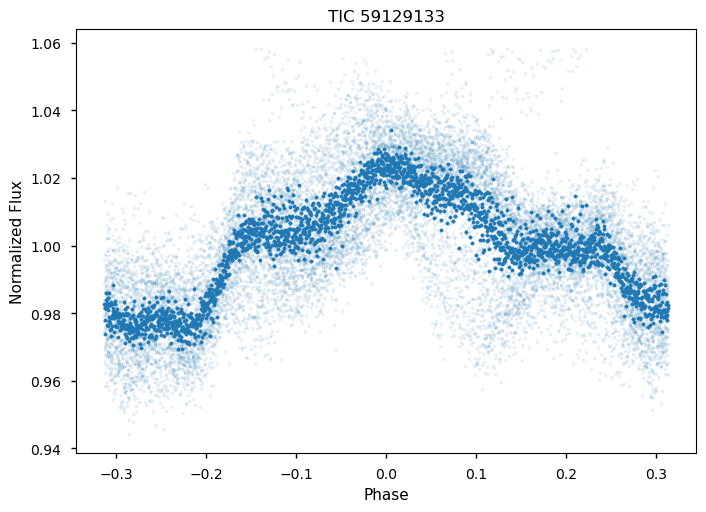

In [11]:
graph_lc(mylc) #change the function to normalize by default but can still set normalize to false

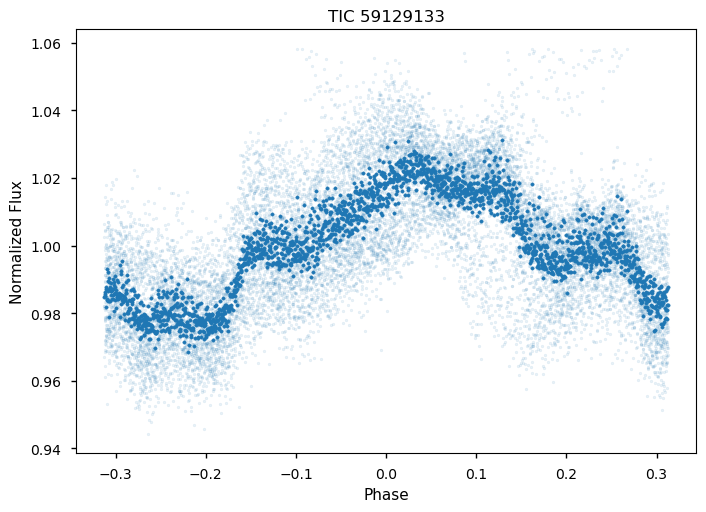

In [12]:
graph_lc(mylc, period=0.6253) #passing the period helps a little bit to get a thinner band

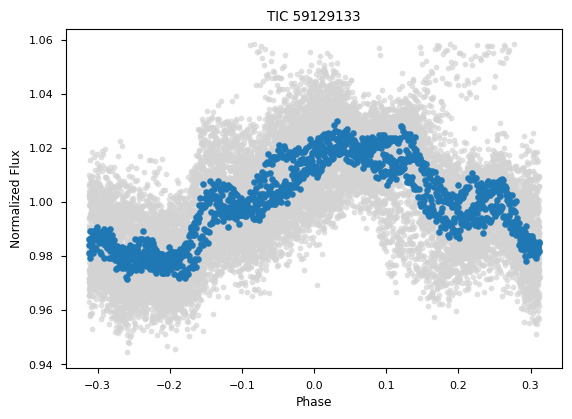

In [13]:
graph_lc_paper(mylc) #dots are larger, separated by color instead of opacity

In [14]:
# def subgraph_phaselc(lc, ylim=None, epoch_time=None, period=None, ax=None, normalize=True, bintime=25):
#     fig = None
#     if period == None:
#         period = lc.to_periodogram().period_at_max_power
#     if epoch_time == None:
#         epoch_time = lc.time[0]
#     if normalize:
#         lc=lc.normalize()
    
#     lc = lc.fold(period, epoch_time)
#     lc = lc.remove_outliers(sigma=3)
    
#     blc = lc.bin(u.Quantity(bintime, u.s)) #default bins to every 25 seconds but can change that
    
#     plt.style.use("seaborn-v0_8-paper")

#     if ax == None:
#         fig, ax = plt.subplots(figsize=(5,4))

#     ax.scatter(lc["time"].value, lc["flux"], 4, "#000000", alpha=0.05)
#     ax.scatter(blc["time"].value, blc["flux"], 6, "#000000", alpha=1)
#     ax.margins(0) #getting rid of unnecessary whitespace
    
#     ax.set_xlabel("Phase")
#     if normalize:
#         ax.set_ylabel("Normalized Flux")
#     else:
#         ax.set_ylabel("Flux")

#     if ylim is not None:
#         ax.set_ylim(-ylim, ylim)
    
#     if fig != None:
#         return fig

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


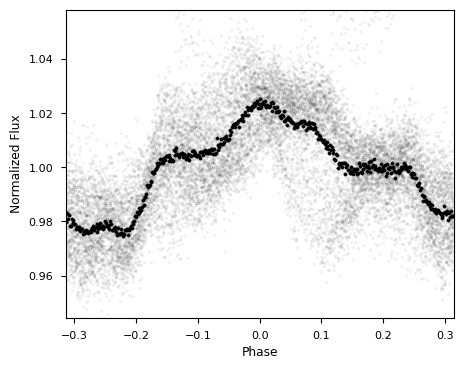

In [15]:
subgraph_phaselc(mylc, bintime=120) #binning it to the same time as the candence narrows the band a lot

In [16]:
# def subgraph_2phaselc(lc, ylim=None, epoch_time=None, period=None, ax=None, normalize=True, bintime=25):
#     fig = None
#     if period == None:
#         period = lc.to_periodogram().period_at_max_power*2
#     if epoch_time == None:
#         epoch_time = lc.time[0]
#     if normalize:
#         lc=lc.normalize()
    
#     lc = lc.fold(period, epoch_time)
#     lc = lc.remove_outliers(sigma=3)
    
#     blc = lc.bin(u.Quantity(bintime, u.s)) #default bins to every 25 seconds but can change that
    
#     plt.style.use("seaborn-v0_8-paper")

#     if ax == None:
#         fig, ax = plt.subplots(figsize=(5,2))

#     ax.scatter(lc["time"].value, lc["flux"], 4, "#000000", alpha=0.05)
#     ax.scatter(blc["time"].value, blc["flux"], 6, "#000000", alpha=1)
#     ax.margins(0) #getting rid of unnecessary whitespace
    
#     ax.set_xlabel("Phase with Periodx2")
#     if normalize:
#         ax.set_ylabel("Normalized Flux")
#     else:
#         ax.set_ylabel("Flux")

#     if ylim is not None:
#         ax.set_ylim(-ylim, ylim)
    
#     if fig != None:
#         return fig

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


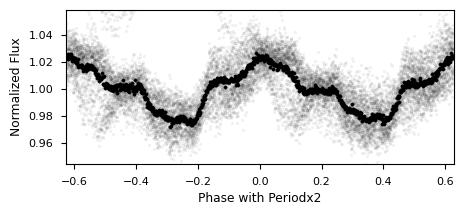

In [17]:
subgraph_2phaselc(mylc, bintime=120) 

In [18]:
# def subgraph_hphaselc(lc, ylim=None, epoch_time=None, period=None, ax=None, normalize=True, bintime=25):
#     #h for half phase
#     fig = None
#     if period == None:
#         period = lc.to_periodogram().period_at_max_power
#     if epoch_time == None:
#         epoch_time = lc.time[0]
#     if normalize:
#         lc=lc.normalize()
    
#     lc = lc.fold(period, epoch_time)
#     lc = lc.remove_outliers(sigma=3)
#     lc1=lc[lc.phase<0]
#     lc2=lc[lc.phase>0]
#     minphase=lc1.phase.min()
#     lc2.time=lc2.time+minphase
    
#     blc1 = lc1.bin(u.Quantity(bintime, u.s)) #default bins to every 25 seconds but can change that
#     blc2 = lc2.bin(u.Quantity(bintime, u.s))
    
#     plt.style.use("seaborn-v0_8-paper")

#     if ax == None:
#         fig, ax = plt.subplots(figsize=(5,2))

#     ax.scatter(lc1["time"].value, lc1["flux"], 4, "#000000", alpha=0.05)
#     ax.scatter(lc2["time"].value, lc2["flux"], 4, "#000000", alpha=0.05)
#     ax.scatter(blc1["time"].value, blc1["flux"], 6, "#000000", alpha=1)
#     ax.scatter(blc2["time"].value, blc2["flux"], 6, "#000000", alpha=1)
#     ax.margins(0) #getting rid of unnecessary whitespace
    
#     ax.set_xlabel("Phase with Periodx0.5")
#     if normalize:
#         ax.set_ylabel("Normalized Flux")
#     else:
#         ax.set_ylabel("Flux")

#     if ylim is not None:
#         ax.set_ylim(-ylim, ylim)
    
#     if fig != None:
#         return fig

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


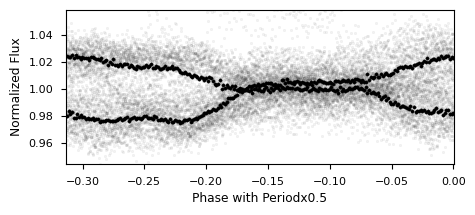

In [19]:
subgraph_hphaselc(mylc, bintime=120) 

In [20]:
# def graph_fulllc(lc, ylim=None, ax=None, normalize=True):
#     fig = None
#     if normalize:
#         lc=lc.normalize()

#     plt.style.use("seaborn-v0_8-paper")

#     if ax == None:
#         fig, ax = plt.subplots(figsize=(10,2))
#     ax.scatter(lc["time"].value, lc["flux"], 1, "#000000", alpha=1)
#     ax.margins(0)

#     ax.set_xlabel("Time")
#     if normalize:
#         ax.set_ylabel("Normalized Flux")
#     else:
#         ax.set_ylabel("Flux")

#     if ylim is not None:
#         ax.set_ylim(-ylim, ylim)

#     if fig != None:
#         return fig

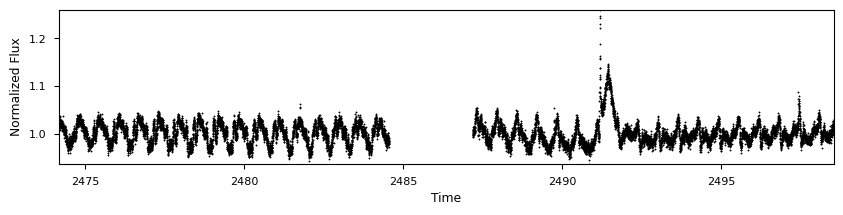

In [21]:
subgraph_fulllc(mylc) #what are the time units here?

In [22]:
# def subgraph_pd(lc, period=None, ax=None):
#     fig = None
#     if period == None:
#         period = lc.to_periodogram(maximum_period=5).period_at_max_power
#         period=period.value
#     pg = lc.to_periodogram(maximum_period=1.2*period)
#     harmonics_lightcurve_pg = []
#     for i in range(1,5):
#         harmonics_lightcurve_pg.append(period/i)

#     plt.style.use("seaborn-v0_8-paper")
    
#     peaks, _ = find_peaks(pg.power, distance = 120, height = pg.max_power.value*0.15)
#     y = pg.power[peaks] #defines y-values as the powers corresponding to the indexes in peaks
#     x = pg.period[peaks] #defines x-values as the periods corresponding to the indexes in peaks
    
#     if ax == None:
#         fig, ax = plt.subplots(figsize=(5,4))
#     pg.plot(ax=ax, c="black")
#     ax.scatter(x, y, c="red", marker="x")
#     ax.margins(0)
#     for i, period in enumerate(harmonics_lightcurve_pg):
#         color = "blue" if i == 0 else "red"
#         ax.axvline(period, alpha=0.2, linewidth=9-(1.4*i), color=color, zorder=0)

#     if fig != None:
#         return fig

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


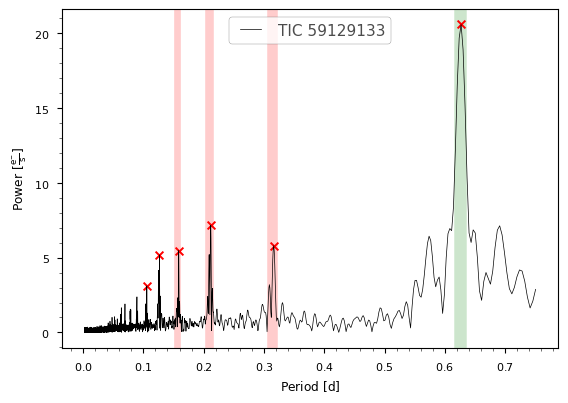

In [23]:
lombscargle(mylc, period=0.6253)

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


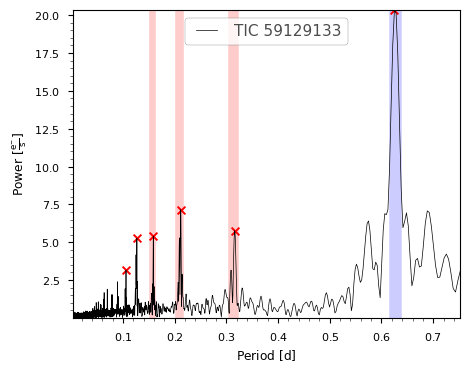

In [24]:
subgraph_pd(mylc)

In [25]:
mylc2=load_lc("TIC 452345586", 10)

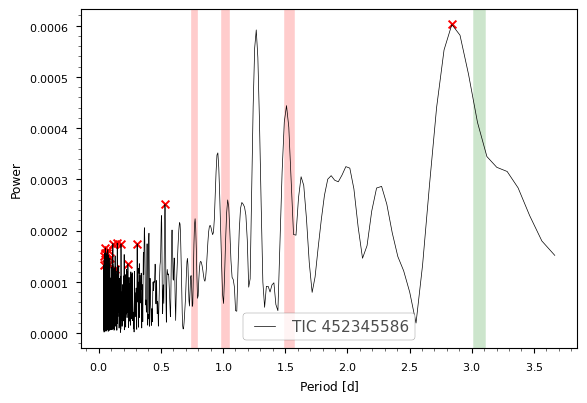

In [26]:
lombscargle(mylc2, period=3.0568)

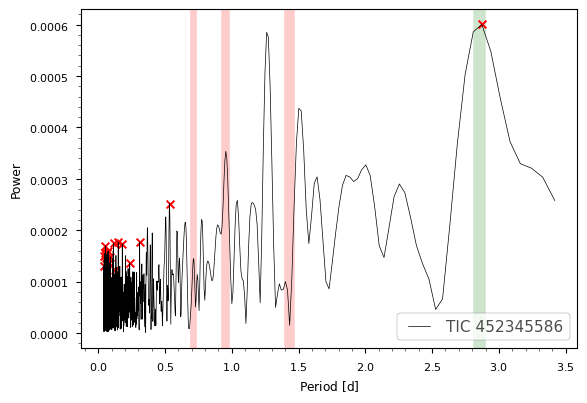

In [27]:
lombscargle(mylc2)

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.16e-04 +/- 2.23e-03); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


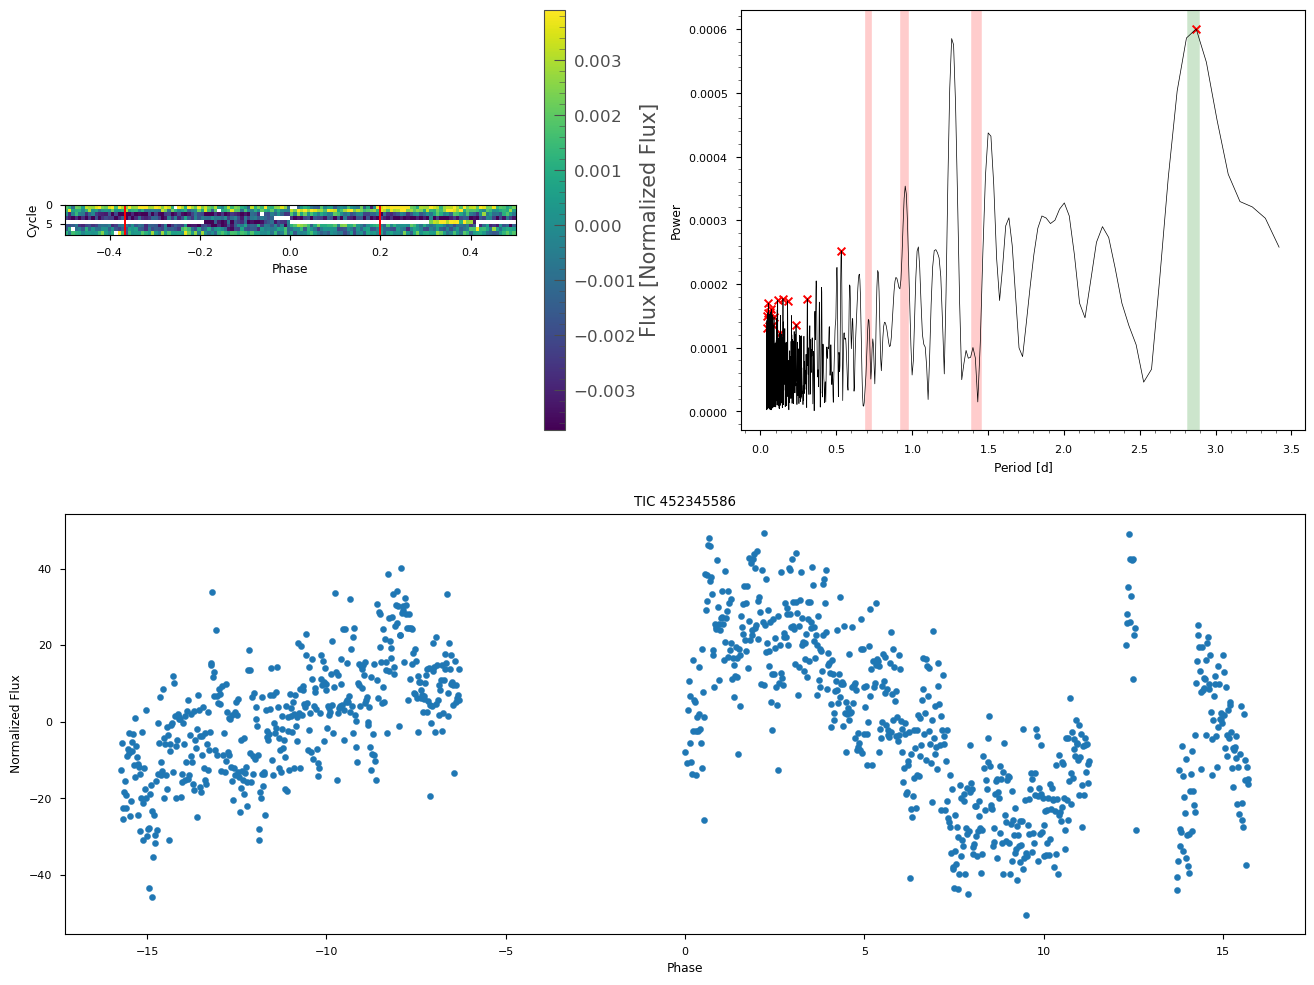

In [28]:
multiplot(mylc2)

In [77]:
def multiplot2(lc, bintime=25):
    fig, axs = plt.subplot_mosaic([
        ['tl', 'tr'],
        ['tl', 'tr'],
        ['ml', 'mr'],
        ['b', 'b']
    ], figsize=(16, 12))
    
    subgraph_phaselc(lc, ax=axs['tl'], bintime=bintime)
    
    subgraph_pd(lc, ax = axs["tr"])
    axs["tr"].get_legend().remove()

    subgraph_2phaselc(lc, ax=axs['ml'], bintime=bintime)
    subgraph_hphaselc(lc, ax=axs['mr'], bintime=bintime)
    
    subgraph_fulllc(lc, ax = axs["b"])

    return fig

In [79]:
figure=multiplot2(mylc, bintime=120)

/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/bdnyc/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


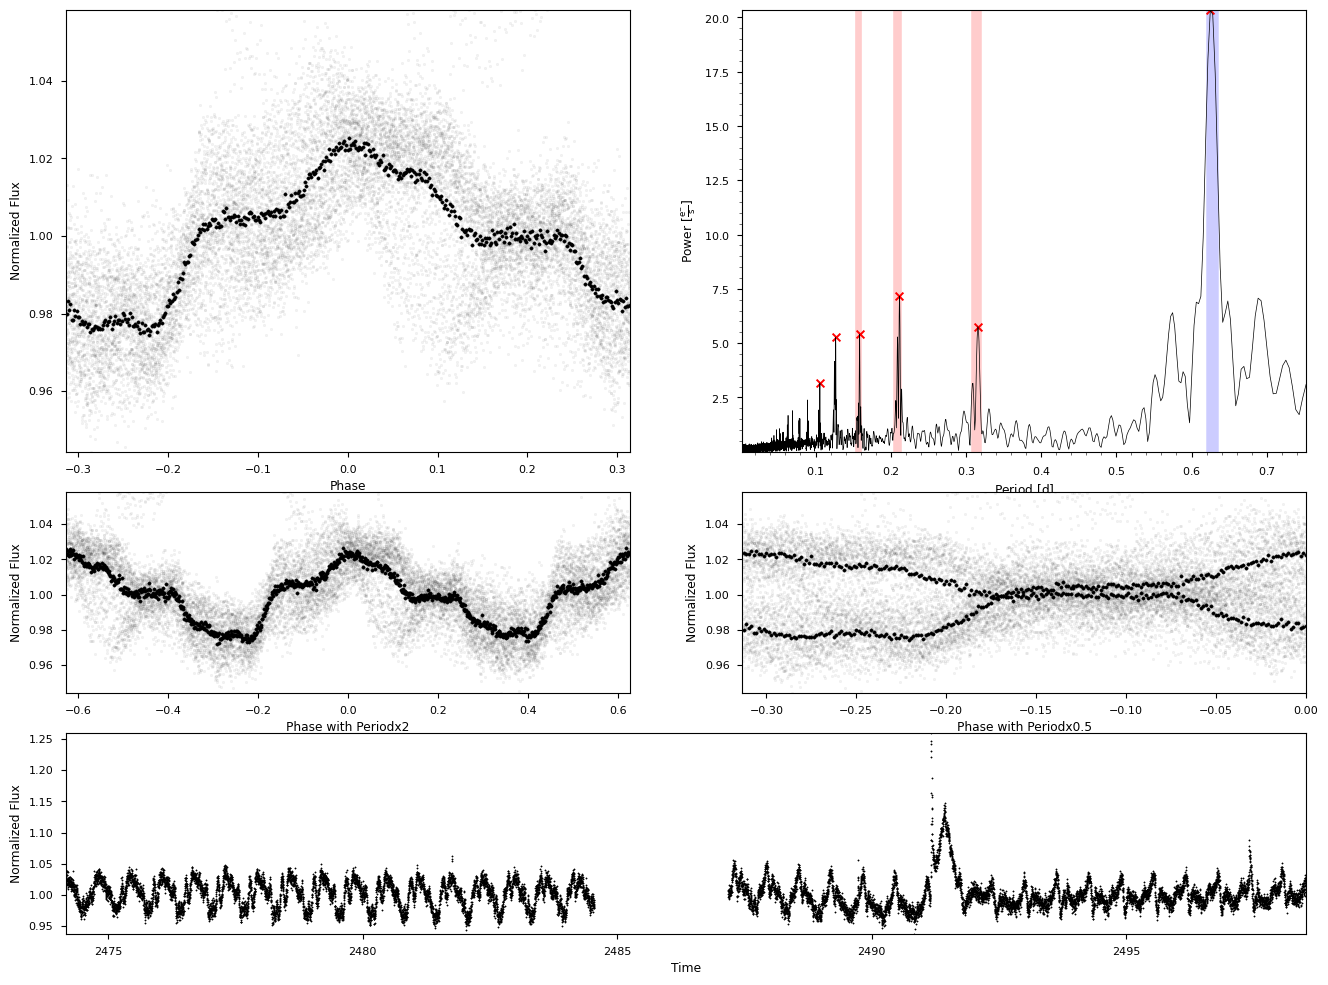

In [80]:
figure

In [81]:
figure.savefig("multiplot.jpg", format='jpg')